In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
orders = pd.read_csv('Orders_all_clean.csv', index_col=None, engine='python')
orders.head()

,Contact_Email_Address,Created,Account_SIC,Price_List,Price_List_Type,Total_Net_Price,Account_Market,Account_Name,Campaign_Name,Contact_First_Name,...,Event_Plan_Code,Event_Plan_Name,Event_Plan_Start_Date,MAC,Order_Date,Order_Number,Registration_Channel,Registration_Type,Sales_Method,Sales_Source
0,jfaddis@taleo.com,1/3/11 9:22,Management Consulting Services,19698.001 - Vendor,Vendor,"$15,500.00",Secondary,Taleo,NaN,Josh,...,19698.001,HCMF Federal Recruitment Strategy Day,5/3/11 20:00,NaN,1/3/11,1-3341865771,NaN,Sponsor,NaN,SMBARRETT
1,christina.morgan1@us.army.mil,1/3/11 9:47,Army,10665.005 - Standard,Primary,"$1,949.00",Primary,US Army Audit Agency,10665.005 HCMD 2011: Unknown without MACs,Christina,...,10665.005,HCMD 2011,2/13/11 19:00,NaN,1/3/11,1-3341957177-A,Website,Delegate,NaN,NaN
2,tfreeth@google.com,1/3/11 9:48,Web Search Portals,10701.005-Vendor,Vendor,"$3,089.00",Secondary,Google,10701.005 ETail West 2011 Delegate Sales Campa...,Tim,...,10701.005,eTail 2011 West,2/21/11 19:00,1-3274993282,1/3/11,1-3342074626,Outbound Phone,Delegate,Full Delegate Sale,TSPETERS
3,charley@gigya-inc.com,1/3/11 9:51,Software As A Service Solution Providers,10701.005-Vendor,Vendor,$0.00,Secondary,Gigya,NaN,Charley,...,10701.005,eTail 2011 West,2/21/11 19:00,NaN,1/3/11,1-3342079261,Phone,Sponsorship Guest,NaN,NaN
4,autumn.coleman@servigistics.com,1/3/11 9:53,Software As A Service Solution Providers,10553.005 - Vendor,Vendor,$0.00,Secondary,PTC,NaN,Autumn,...,10553.005,Interlog Winter 2011,1/24/11 19:00,NaN,1/3/11,1-3342070411-A,NaN,Sponsorship Guest,NaN,NaN


In [4]:
#original data types
orders.dtypes

Contact_Email_Address     object
Created                   object
Account_SIC               object
Price_List                object
Price_List_Type           object
Total_Net_Price           object
Account_Market            object
Account_Name              object
Campaign_Name             object
Contact_First_Name        object
Contact_Job_Function      object
Contact_Job_Title         object
Contact_Last_Name         object
Currency                  object
Event_Plan_Code          float64
Event_Plan_Name           object
Event_Plan_Start_Date     object
MAC                       object
Order_Date                object
Order_Number              object
Registration_Channel      object
Registration_Type         object
Sales_Method              object
Sales_Source              object
dtype: object

In [6]:
# Orders - Converting data types
orders['Created']  = pd.to_datetime(orders['Created'])
orders['Price_List_Type']  = orders['Price_List_Type'].astype('category')

# remove the negative price orders either mistake or cancellation and currency symbols
orders['Total_Net_Price'] = orders['Total_Net_Price'].replace('[\$, ]', '', regex=True)  \
                           .replace('[\€, ]', '', regex=True).replace('[\�, ]', '', regex=True)  \
                           .replace('[R, ]', '', regex=True)
orders = orders[orders.Total_Net_Price != '(26.00)']
orders['Total_Net_Price']  = orders['Total_Net_Price'].astype('float')

orders['Account_Market'] = orders['Account_Market'].astype('category')
orders['Currency'] = orders['Currency'].astype('category')
orders['Event_Plan_Start_Date']  = pd.to_datetime(orders['Event_Plan_Start_Date']).dt.normalize()
orders['Order_Date']  = pd.to_datetime(orders['Order_Date']).dt.normalize()
orders['Registration_Channel'] = orders['Registration_Channel'].fillna(value='Not Available').astype('category')
orders['Registration_Type']  = orders['Registration_Type'].astype('category')
orders['Registration_Type']  = orders['Registration_Type'].astype('category')

# Attributing sales source by registration type, creating new categorical series.
orders.loc[orders.Registration_Type == 'Speaker Guest', 'Sales_Source'] = 'Production'
orders.loc[orders.Registration_Type == 'Speaker', 'Sales_Source'] = 'Production'
orders.loc[orders.Registration_Type == 'Sponsor Attendee', 'Sales_Source'] = 'Sponsorship'
orders.Sales_Source.fillna(value='Marketing', inplace=True)

orders['Sales_Source_Cat'] = pd.Series()
orders.loc[orders.Registration_Type == 'Speaker Guest', 'Sales_Source_Cat'] = 'Production'
orders.loc[orders.Registration_Type == 'Speaker', 'Sales_Source_Cat'] = 'Production'
orders.loc[orders.Registration_Type == 'Sponsor Attendee', 'Sales_Source_Cat'] = 'Sponsorship'
orders.loc[orders.Registration_Type == 'Sponsor', 'Sales_Source_Cat'] = 'Sponsorship'
orders.loc[orders.Sales_Source == 'Marketing', 'Sales_Source_Cat'] = 'Marketing'
orders.Sales_Source_Cat.fillna(value='Delegate Sales', inplace=True)
orders['Sales_Source_Cat']  = orders['Sales_Source_Cat'].astype('category')

orders.dtypes

Contact_Email_Address            object
Created                  datetime64[ns]
Account_SIC                      object
Price_List                       object
Price_List_Type                category
Total_Net_Price                 float64
Account_Market                 category
Account_Name                     object
Campaign_Name                    object
Contact_First_Name               object
Contact_Job_Function             object
Contact_Job_Title                object
Contact_Last_Name                object
Currency                       category
Event_Plan_Code                 float64
Event_Plan_Name                  object
Event_Plan_Start_Date    datetime64[ns]
MAC                              object
Order_Date               datetime64[ns]
Order_Number                     object
Registration_Channel           category
Registration_Type              category
Sales_Method                     object
Sales_Source                     object
Sales_Source_Cat               category


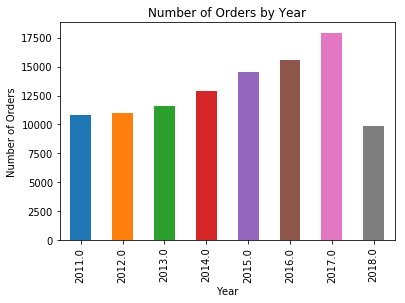

In [7]:
#Breakdown of orders by division

ax = orders.groupby(orders.Order_Date.dt.year).Sales_Source_Cat.count().plot(kind='bar', title='Number of Orders by Year')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

#NEED TO REMOVE DECIMALS ON YEARS


ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

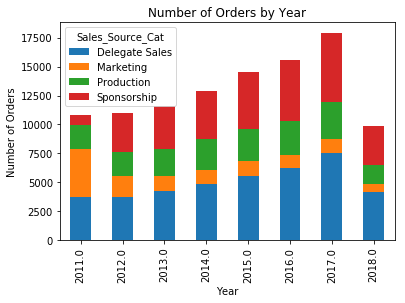

In [8]:
#Breakdown of orders by division

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = orders.groupby([orders.Order_Date.dt.year, 'Sales_Source_Cat']).Sales_Source_Cat.count().unstack('Sales_Source_Cat')\
.plot(kind='bar', stacked=True, title='Number of Orders by Year')
ax.xaxis_date()
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

#NEED TO REMOVE DECIMALS ON YEARS
#WAS UNABLE TO FIGURE OUT ERROR - ANY WAY TO REMOVE?

# interesting to see the growth in Delegate Sales registrations


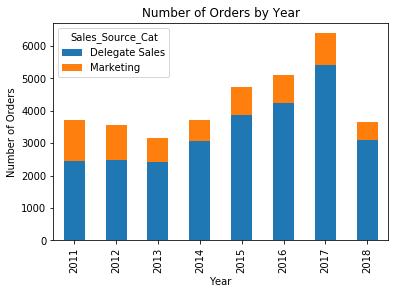

In [9]:
orders_delegate = orders[orders.Registration_Type == 'Delegate']
ax = orders_delegate.groupby([orders_delegate.Order_Date.dt.year, 'Sales_Source_Cat']).Sales_Source_Cat.count().unstack('Sales_Source_Cat')\
.plot(kind='bar', stacked=True, title='Number of Orders by Year')
ax.xaxis_date()
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

In [10]:
# Identifying top 10 days in terms of number of delegate registrations
top10days = orders_delegate['Total_Net_Price'].groupby(orders_delegate.Order_Date).agg(['mean', 'count'])
top10days.sort_values('count', ascending=False).head(10)

#Top 10 days all within the last two years
#All fall on the last 2 days of the month!

,mean,count
Order_Date,,
2018-01-31,1341.435957,141
2018-04-30,1254.289841,126
2017-01-31,1390.507265,117
2018-02-28,1103.890000,103
2017-02-28,1404.298600,100
2017-03-31,1354.684105,95
2017-09-29,1212.224839,93
2016-08-31,1114.764767,86
2015-01-30,1805.966395,86


In [11]:
# Identifying top 10 days in terms of sponsor registrations
orders_sponsors = orders[orders.Registration_Type == 'Sponsor']
top10days = orders_sponsors['Total_Net_Price'].groupby(orders_sponsors.Order_Date).agg(['mean', 'count'])
top10days.sort_values('count', ascending=False).head(10)

,mean,count
Order_Date,,
2018-01-05,17613.636364,22
2016-12-20,20816.666667,21
2017-11-03,22033.910000,20
2017-11-07,23030.000000,20
2016-10-25,17355.000000,20
2018-01-16,18600.000000,20
2018-04-13,23907.894737,19
2018-02-26,30183.421053,19
2016-11-14,20400.000000,18


In [12]:
#Calculating difference betwen order date and event date
orders['Days_Ahead_of_Event'] = orders['Event_Plan_Start_Date']-orders['Order_Date']
orders['Days_Ahead_of_Event'].head()

0   120 days
1    41 days
2    49 days
3    49 days
4    21 days
Name: Days_Ahead_of_Event, dtype: timedelta64[ns]

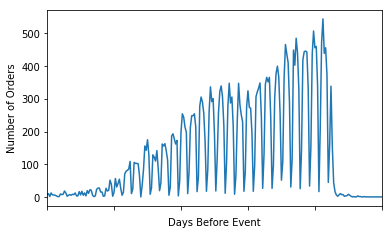

In [13]:
#Attempting to plot number of registrations in relation to time before event start

orders_delegate = orders[orders.Registration_Type == 'Delegate']
ax = orders_delegate.groupby([orders_delegate.Days_Ahead_of_Event]).Order_Number.count().plot()
plt.xlim(250,0)
plt.xticks([250, 200, 150, 100, 50, 0])  #Doesn't work - how to set x axis labels?
ax.set_xlabel("Days Before Event")
plt.xticks(rotation=30)
ax.set_ylabel("Number of Orders")
plt.show()

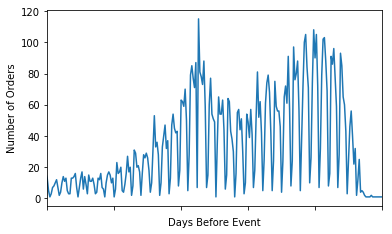

In [14]:
#Attempting to plot number of sponsorship deals in relation to time before event start

orders_sponsors = orders[orders.Registration_Type == 'Sponsor']
ax = orders_sponsors.groupby([orders_sponsors.Days_Ahead_of_Event]).Order_Number.count().plot()
plt.xlim(250,0)
plt.xticks([250, 200, 150, 100, 50, 0])  #Doesn't work - how to set x axis labels?
ax.set_xlabel("Days Before Event")
plt.xticks(rotation=30)
ax.set_ylabel("Number of Orders")
plt.show()

In [15]:
# Creating unnique IDs for each person pased on first name, last name and email
# Original columns will be removed for data propection
orders['id'] = orders.groupby(['Contact_First_Name','Contact_Last_Name', 'Contact_Email_Address']).ngroup()

In [16]:
# Do certain types of companies (SIC) that pay more or less to attend conferences?
orders_delegate = orders[orders.Registration_Type == 'Delegate']
top10SIC = orders_delegate['Total_Net_Price'].groupby(orders_delegate.Account_SIC).agg(['mean', 'count'])
#top10SIC = top10SIC['count]>=10   # How do I keep only those gorupd with counts of 10+?
top10SIC.sort_values('count', ascending=False).head(10)

,mean,count
Account_SIC,,
Software As A Service Solution Providers,2295.444637,1818
Pharmaceutical,1878.980647,1066
Investment Banking and Securities Dealing,1417.661348,1016
Clothing Stores,918.529980,1004
Advertising/Marketing,2686.474425,669
"Medical, Dental, and Hospital Equipment and 423450",1538.176647,665
Department Stores,990.983769,650
IT Solutions & Services Providers,2207.772083,533
Management Consulting Services,2445.087417,515


In [17]:
#What is the most popular day of the week to purchase an event ticket?
#No Real outliers - Didnt expect Tuesday but not significantely more.

orders_delegate['day_of_week'] = orders_delegate['Order_Date'].dt.weekday_name
orders_delegate['Order_Number'].groupby(orders_delegate['day_of_week']).count()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


day_of_week
Friday       6895
Monday       6214
Saturday       99
Sunday         91
Thursday     6888
Tuesday      7144
Wednesday    6755
Name: Order_Number, dtype: int64

In [18]:
orders = orders[orders.Order_Number.notnull()]
orders['Order_Number']=orders['Order_Number'].astype(str)
orders['Group_Size'] = ""
print(orders['Order_Number'].head())
dict = {}

print (orders['Order_Number'][1][0:12])

for i in orders['Order_Number']:
    x = i[:12]
    if not x in dict:
        dict[x] = 1
    else:
        dict[x] += 1

0      1-3341865771
1    1-3341957177-A
2      1-3342074626
3      1-3342079261
4    1-3342070411-A
Name: Order_Number, dtype: object
1-3341957177


In [19]:
group_size = []

for i in orders['Order_Number']:
    x = i[:12]
    group_size.append(dict[x])

orders['Group_Size'] = group_size

In [20]:
orders['Order_Number'].groupby(orders['Group_Size']).agg('count')

Group_Size
1     74573
2     13834
3      6864
4      3952
5      1930
6       996
7       476
8       472
9       234
10      260
11      132
12      144
13       91
14       14
15       30
17       17
20       20
21       42
Name: Order_Number, dtype: int64

             Contact_Email_Address             Created  \
0                jfaddis@taleo.com 2011-01-03 09:22:00   
1    christina.morgan1@us.army.mil 2011-01-03 09:47:00   
2               tfreeth@google.com 2011-01-03 09:48:00   
3            charley@gigya-inc.com 2011-01-03 09:51:00   
4  autumn.coleman@servigistics.com 2011-01-03 09:53:00   

                                Account_SIC            Price_List  \
0            Management Consulting Services    19698.001 - Vendor   
1                                      Army  10665.005 - Standard   
2                        Web Search Portals      10701.005-Vendor   
3  Software As A Service Solution Providers      10701.005-Vendor   
4  Software As A Service Solution Providers    10553.005 - Vendor   

  Price_List_Type  Total_Net_Price Account_Market          Account_Name  \
0          Vendor          15500.0      Secondary                 Taleo   
1         Primary           1949.0        Primary  US Army Audit Agency   
2          

In [72]:
#Creating a list of job title seniority based on full job titles. Appending list to DataFrame
orders['Contact_Job_Title'] = orders.Contact_Job_Title.fillna("UNKNOWN")

job_title = []
c_level = ['Chief','CEO','CMO','CDO','CIO','CPO','CTO','Head']
vp = ['VP','Vice President']

for i in orders['Contact_Job_Title']:
    if any(title in i for title in c_level):
        job_title.append("C-Level")
    elif any(title in i for title in vp):
        job_title.append("VP")
    elif "Director" in i:
        job_title.append("Director")
    elif "Manager" in i:
        job_title.append("Manager")
    elif "Consultant" in i:
        job_title.append("Consultant")
    else:
        job_title.append("Other")
        
orders['job_title'] = job_title
orders['job_title'].value_counts()

Director      25797
Manager       24560
Other         24074
VP            16218
C-Level       12349
Consultant     1083
Name: job_title, dtype: int64

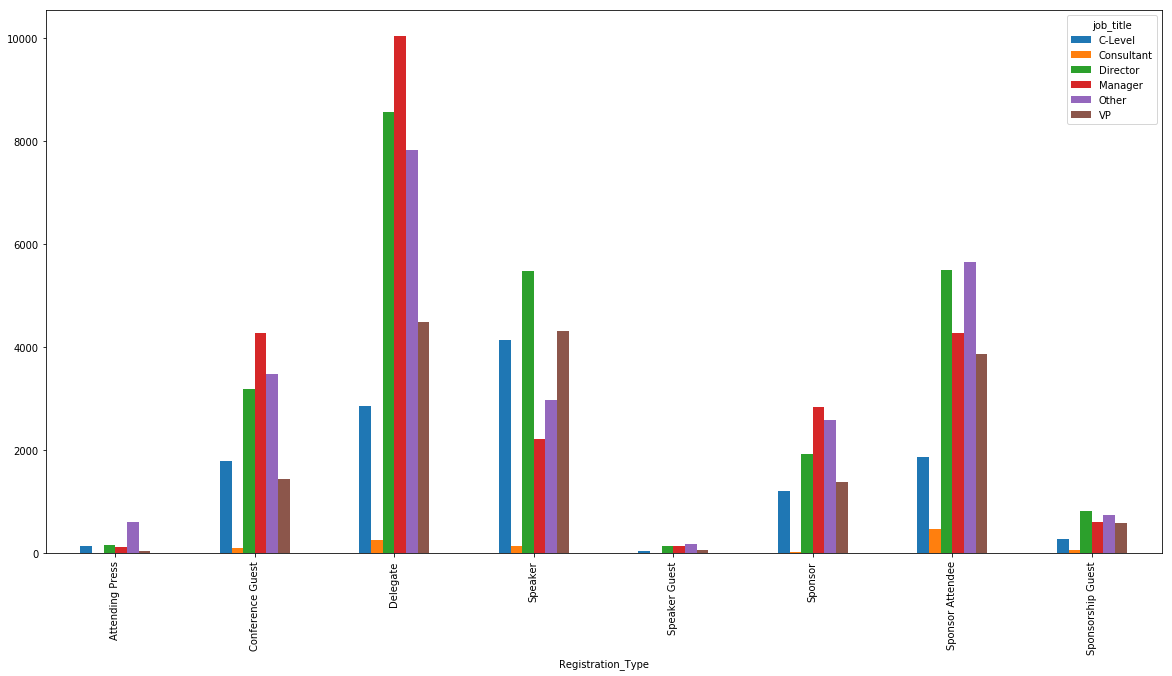

In [108]:
orders['job_title'].groupby(orders['Registration_Type']).value_counts().unstack().plot(kind='bar', figsize=(20,10))

#orders['job_title'].groupby(orders['Registration_Type']).count.plot()
#plt.show()

In [140]:
orders['job_title'].groupby(orders['Registration_Type']).value_counts(normalize=True)

# Delegates - 25% Director, 13% VP, 8% C-Level
# Speakers - 28% Director, 22% VP, 21% C-Level
# Conference Guset - 22% Director, 10% VP, 12% C-Level (This seems low for Guests)

Registration_Type  job_title 
Attending Press    Other         0.568352
                   Director      0.155431
                   C-Level       0.131086
                   Manager       0.107678
                   VP            0.034644
                   Consultant    0.002809
Conference Guest   Manager       0.299419
                   Other         0.244070
                   Director      0.222798
                   C-Level       0.125674
                   VP            0.100903
                   Consultant    0.007137
Delegate           Manager       0.294960
                   Director      0.251482
                   Other         0.229596
                   VP            0.132048
                   C-Level       0.084023
                   Consultant    0.007892
Speaker            Director      0.284047
                   VP            0.223939
                   C-Level       0.215227
                   Other         0.154082
                   Manager       0.115704
    

In [141]:
orders.groupby(['Sales_Source_Cat','Registration_Type']).count()

Contact_Email_Address  Created  \
Sales_Source_Cat Registration_Type                                   
Delegate Sales   Attending Press                      NaN      NaN   
                 Conference Guest                 12434.0  12738.0   
                 Delegate                         26584.0  27073.0   
                 Speaker                              NaN      NaN   
                 Speaker Guest                        NaN      NaN   
                 Sponsor                              NaN      NaN   
                 Sponsor Attendee                     NaN      NaN   
                 Sponsorship Guest                  171.0    173.0   
Marketing        Attending Press                   1025.0   1068.0   
                 Conference Guest                  1385.0   1553.0   
                 Delegate                          6946.0   7013.0   
                 Speaker                              NaN      NaN   
                 Speaker Guest                        NaN      NaN   
                 Sponsor                             75.0     75.0   
                 Sponsor Attendee                     NaN      NaN   
                 Sponsorship Guest                 2855.0   2935.0   
Production       Attending Press                      NaN      NaN   
                 Conference Guest                     NaN      NaN   
                 Delegate                             NaN      NaN   
                 Speaker                          18627.0  19282.0   
                 Speaker Guest                      524.0    580.0   
                 Sponsor                              NaN      NaN   
                 Sponsor Attendee                     NaN      NaN   
                 Sponsorship Guest                    NaN      NaN   
Sponsorship      Attending Press                      NaN      NaN   
                 Conference Guest                     NaN      NaN   
                 Delegate                             NaN      NaN   
                 Speaker                              NaN      NaN   
                 Speaker Guest                        NaN      NaN   
                 Sponsor                           9865.0   9931.0   
                 Sponsor Attendee                 21260.0  21660.0   
                 Sponsorship Guest                    NaN      NaN   

                                    Account_SIC  Price_List  Price_List_Type  \
Sales_Source_Cat Registration_Type                                             
Delegate Sales   Attending Press            NaN         NaN              NaN   
                 Conference Guest       12691.0     12736.0          12564.0   
                 Delegate               26980.0     27071.0          26862.0   
                 Speaker                    NaN         NaN              NaN   
                 Speaker Guest              NaN         NaN              NaN   
                 Sponsor                    NaN         NaN              NaN   
                 Sponsor Attendee           NaN         NaN              NaN   
                 Sponsorship Guest        170.0       173.0            173.0   
Marketing        Attending Press         1035.0      1067.0           1055.0   
                 Conference Guest        1544.0      1486.0           1452.0   
                 Delegate                6970.0      6998.0           6967.0   
                 Speaker                    NaN         NaN              NaN   
                 Speaker Guest              NaN         NaN              NaN   
                 Sponsor                   75.0        75.0             75.0   
                 Sponsor Attendee           NaN         NaN              NaN   
                 Sponsorship Guest       2921.0      2935.0           2923.0   
Production       Attending Press            NaN         NaN              NaN   
                 Conference Guest           NaN         NaN              NaN   
                 Delegate                   NaN        

In [169]:
import numpy as np

#table = orders.pivot_table(orders, index=['Sales_Source_Cat','Registration_Type'], columns=['job_title'], aggfunc=np.sum)
bydept = orders.groupby(['Sales_Source_Cat','job_title'], as_index=False)['Registration_Type'].count().reset_index()
print(bydept)

    index Sales_Source_Cat   job_title  Registration_Type
0       0   Delegate Sales     C-Level               3871
1       1   Delegate Sales  Consultant                270
2       2   Delegate Sales    Director               9582
3       3   Delegate Sales     Manager              12307
4       4   Delegate Sales       Other               9213
5       5   Delegate Sales          VP               4741
6       6        Marketing     C-Level               1214
7       7        Marketing  Consultant                166
8       8        Marketing    Director               3184
9       9        Marketing     Manager               2769
10     10        Marketing       Other               3474
11     11        Marketing          VP               1837
12     12       Production     C-Level               4192
13     13       Production  Consultant                139
14     14       Production    Director               5614
15     15       Production     Manager               2383
16     16     

In [170]:
events = pd.read_csv('Events_Since_2012_Clean.csv', index_col=None, engine='python')
events.head()

,Topic_Area,Type,Code,Promotion_Plan,Event_Plan_Date,Total_Dels,Total_Rev,Booking_Pattern_Comparison,Total_Guests,Avg_Cost_of_Acquisition,...,Total_EQ_Rev,EQ_Price_Point,EQ_perc_of_ttl_Rev,Spex_Rev,Spex_Last_Year,Num_Spex_EQs,Num_Spex_Props,Props_Last_Year,Num_TMs,Num_SPKRs
0,Retail,Stage 1,20553.001,Social Commerce Strategies,1/24/12,67,80759,NaN,30.0,176.0,...,24950,1386.0,31%,199000,NaN,115,42.0,NaN,226.0,45
1,Logistics,Stage 1,20743.001,Field Service Medical 2012,1/23/12,89,154039,NaN,31.0,127.0,...,43651,1898.0,28%,166000,NaN,70,29.0,NaN,141.0,26
2,Retail,Stage 2/LSE,10701.006,eTail 2012 West,2/27/12,536,853865,499.0,872.0,122.0,...,180827,1435.0,21%,3765700,3091000.0,250,187.0,164.0,456.0,204
3,Procurement,Stage 2/LSE,12727.005,ProcureCon Indirect East 2012,2/13/12,89,129305,65.0,100.0,129.0,...,37587,1392.0,29%,440250,407500.0,74,39.0,44.0,281.0,78
4,Logistics,Stage 1,19328.002,Defense Maintenance 2012,2/27/12,115,150381,156.0,24.0,142.0,...,43221,1351.0,29%,174500,107800.0,104,34.0,14.0,18.0,43


In [171]:
#original data types
events.dtypes

Topic_Area                     object
Type                           object
Code                          float64
Promotion_Plan                 object
Event_Plan_Date                object
Total_Dels                      int64
Total_Rev                       int64
Booking_Pattern_Comparison    float64
Total_Guests                  float64
Avg_Cost_of_Acquisition       float64
Sales_and_Mktg_ROI             object
Mktg_Dels                       int64
Mktg_Cost__fcst               float64
Mktg_Cost_act                 float64
Mktg_Rev                        int64
Mktg_perc_of_ttl_Rev           object
Mktg_Price_Point              float64
Cost_of_Acquisition           float64
PP__fcst                      float64
PP__act                       float64
ROI__fcst                      object
ROI__act                       object
Sales_Dels                      int64
Sales_Rev                       int64
Sales_perc_of_ttl_rev          object
Sales_Price_Point               int64
Num_Active_I

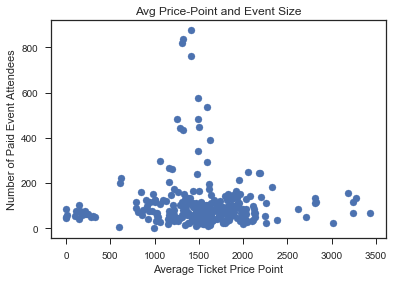

In [309]:
# Is there a correlation between price point and total number of paid attendees?
x = events.Total_Rev/events.Total_Dels
y = events.Total_Dels
plt.scatter(x,y)
plt.title("Avg Price-Point and Event Size")
plt.xlabel("Average Ticket Price Point")
plt.ylabel("Number of Paid Event Attendees")
plt.show()

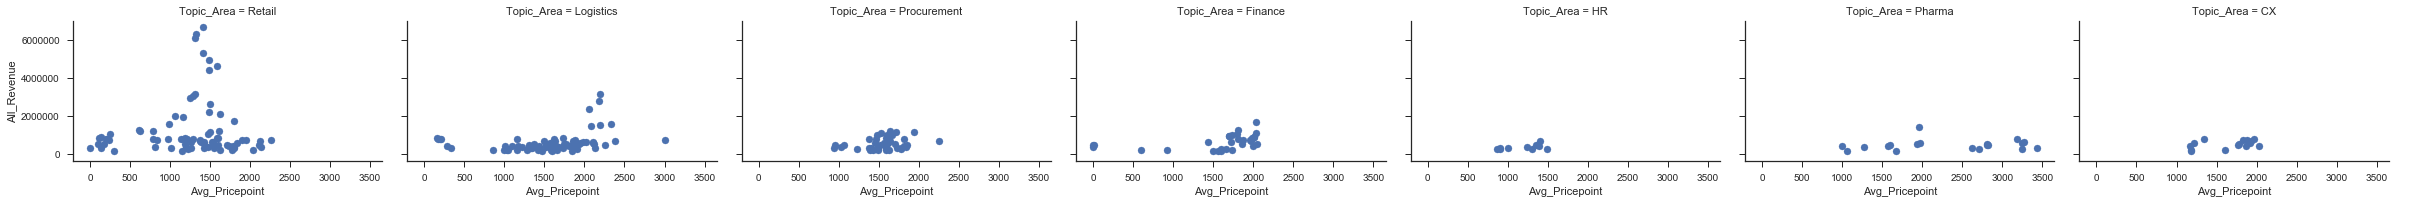

In [305]:
# Price point to event revenue correlation BY EVENT TOPIC AREA
import seaborn
seaborn.set(style='ticks')

events['Avg_Pricepoint'] = events.Total_Rev/events.Total_Dels
events['All_Revenue'] = events.Total_Rev+events.Spex_Rev

df = events[['Avg_Pricepoint', 'All_Revenue', 'Topic_Area']]
fg = seaborn.FacetGrid(data=df, col='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'All_Revenue').add_legend()

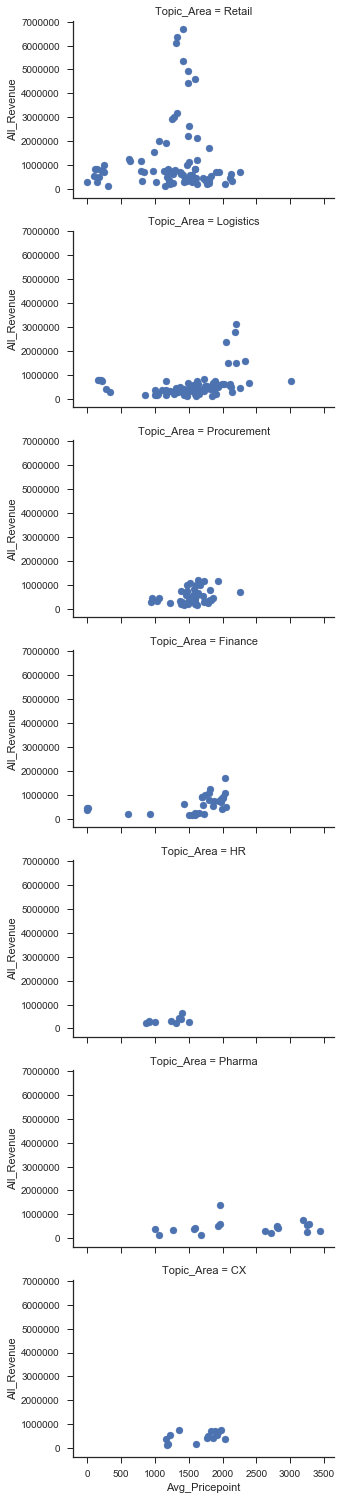

In [173]:
# Price point to event revenue correlation BY EVENT TOPIC AREA
import seaborn
seaborn.set(style='ticks')

events['Avg_Pricepoint'] = events.Total_Rev/events.Total_Dels
events['All_Revenue'] = events.Total_Rev+events.Spex_Rev

df = events[['Avg_Pricepoint', 'All_Revenue', 'Topic_Area']]
fg = seaborn.FacetGrid(data=df, row='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'All_Revenue').add_legend()

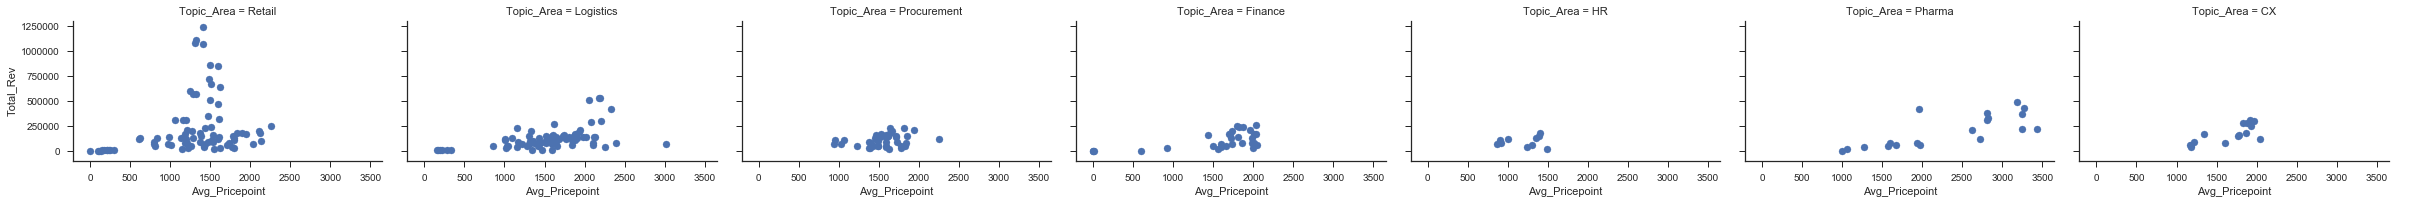

In [174]:
# Price point to total attendee revenue correlation BY EVENT TOPIC AREA
df = events[['Avg_Pricepoint', 'Total_Rev', 'Topic_Area']]
fg = seaborn.FacetGrid(data=df, col='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'Total_Rev').add_legend()

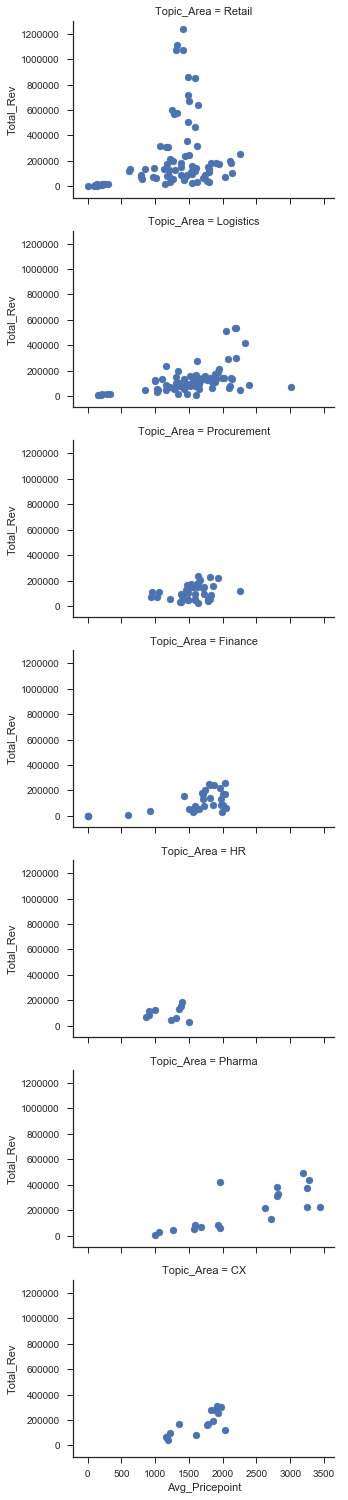

In [175]:
# Price point to total attendee revenue correlation BY EVENT TOPIC AREA
df = events[['Avg_Pricepoint', 'Total_Rev', 'Topic_Area']]
fg = seaborn.FacetGrid(data=df, row='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'Total_Rev').add_legend()

In [ ]:
## More ideas:

# Growth by year by event topic area: number of attendees, revenue, number of events per year
# 